## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [396]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [398]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)
print(X.columns.values.tolist())

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

* Есть ли в данных пропущенные значения?

In [330]:
print('There is ' + ('some' if X.isna().any().any() or np.isnan(y).any() else 'no') + " NaN values in dataSet!")
# видимо подразумевалось, что данные не имеют пропусков, но в общем случае надо было использовать .dropna - для удаления строк axis=0,
# что плохая практика лучше было бы заменить на среднее значение (если признак numeric) -> 
# X.fillna(X.mean(), inplace=True)

There is no NaN values in dataSet!


* Есть ли в списке категориальные переменные?

In [331]:
amountOfCat = len(X.select_dtypes(include=['object']).columns.tolist())
print(f'There is {amountOfCat} categorical variables in dataSet!')
# в противном случае можно было бы использовать метод .get_dummies() для OneHot кодирования

There is 0 categorical variables in dataSet!


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [332]:
from sklearn.model_selection import train_test_split
np.random.seed(12345)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((124, 13), (54, 13), (124,), (54,))

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [333]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scaler = StandardScaler()

Xtrain_alc_mag = X_train[['alcohol', 'magnesium']]
Xtest_alc_mag = X_test[['alcohol', 'magnesium']]

scaler.fit(Xtrain_alc_mag)

Xtrain_sc = scaler.transform(Xtrain_alc_mag)
Xtest_sc = scaler.transform(Xtest_alc_mag)

neighbours = [1, 3, 5, 10, 15, 25]

savedClf = []

print("NN\tTrain\tTest")
for i in neighbours:
    clf = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean')
    clf.fit(Xtrain_sc, Y_train)
    
    savedClf.append(clf)
    
    pred_train = clf.predict(Xtrain_sc)
    pred_test = clf.predict(Xtest_sc)
    print(f"{i}\t{accuracy_score(pred_train, Y_train):.3f}\t{accuracy_score(pred_test, Y_test):.3f}")



NN	Train	Test
1	1.000	0.630
3	0.823	0.741
5	0.806	0.741
10	0.758	0.722
15	0.742	0.667
25	0.742	0.667


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [334]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [335]:
import mlxtend

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

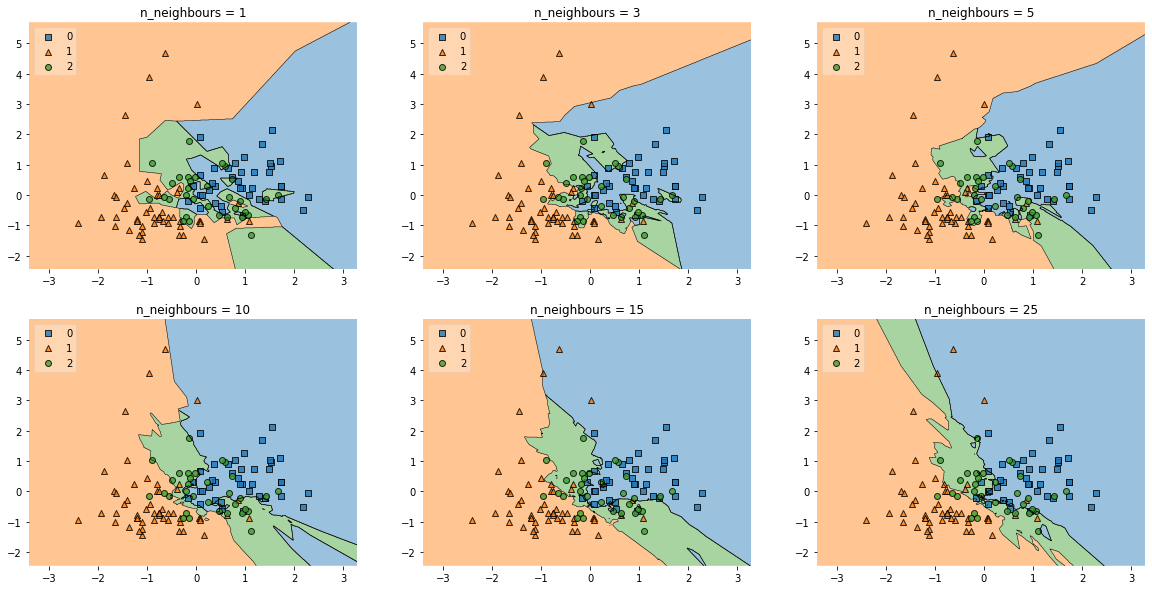

In [336]:
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(20,10))

labels = ['n_neighbours = 1', 'n_neighbours = 3', 'n_neighbours = 5',
          'n_neighbours = 10', 'n_neighbours = 15', 'n_neighbours = 25']

for clf, lab, grd in zip(savedClf,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=Xtrain_sc, y=Y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

### Комментарий

Согласно результатам полученным в задании 1.3 наиболее оптимальное число соседей - 3 или 5 (accuracy_score = 0.741 для обоих случаев в тестовой выборке, что является наивысшим результатом среди рассмотренных случаев) Результаты визуализации решающих поверхностей также подтверждают выбор третьего задания, здесь число соседей - 5 выглядит более репрезентабельно, количество элементов находящихся в пределах других классов минимально, признаки переобучения модели не прослеживаются (например при сравнении с решающей поверхностью для 25 соседей, где члены класса 1 находятся глубоко в зоне класса 0), также зоны классов данных моделей наименее резкие среди представленных.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

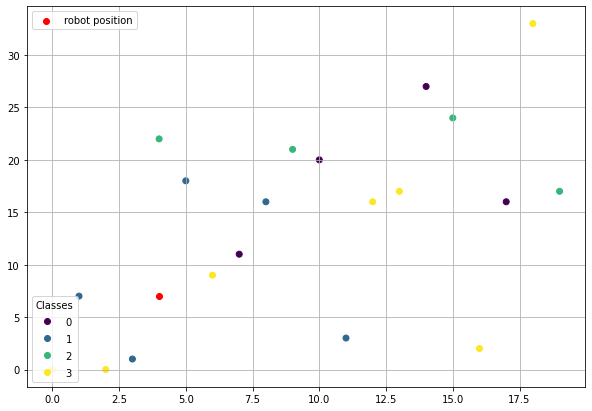

In [337]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [338]:
from sklearn.neighbors import KNeighborsClassifier

In [348]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = [initial_position]
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(landmarks,classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        if np.random.binomial(1, 0.2) == 1:
            self.trajectory.append(self.trajectory[-1] + self.mapping[0])
        else:
            self.trajectory.append(self.trajectory[-1] + self.mapping[self.knn.predict([self.trajectory[-1]])[0]])

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [349]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = np.array(robot.trajectory)
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

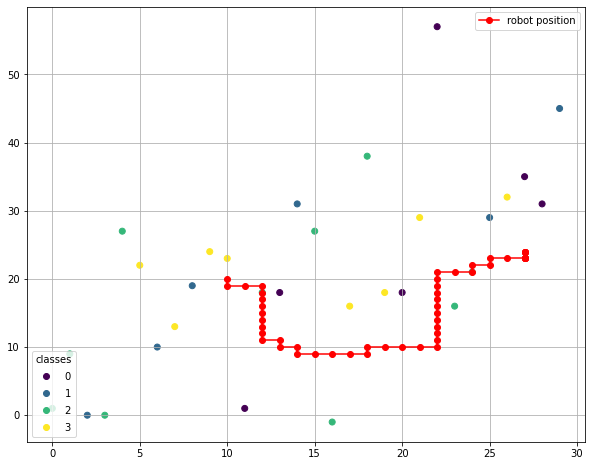

In [350]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

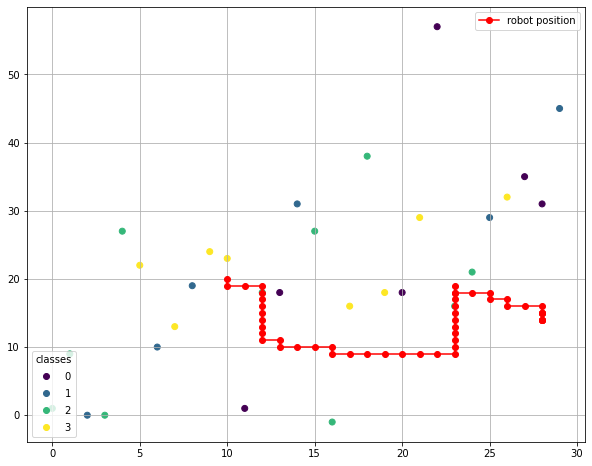

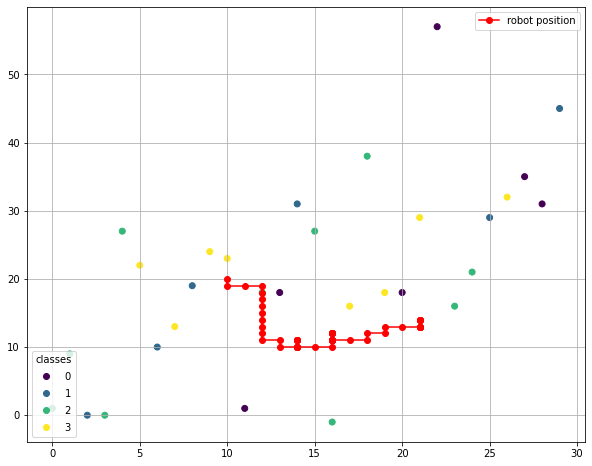

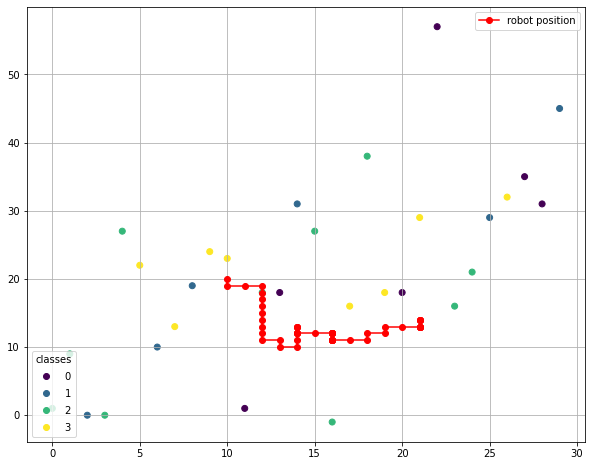

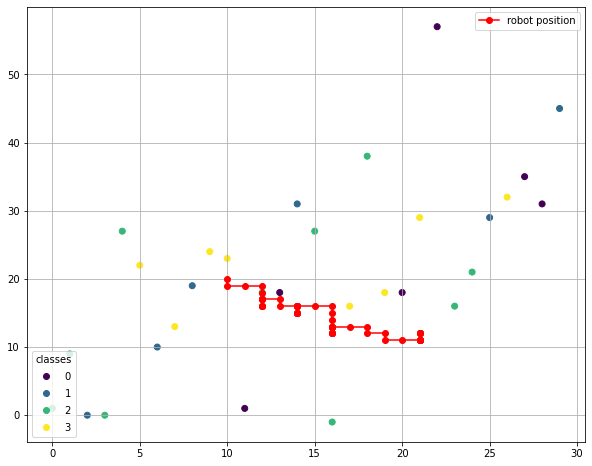

In [351]:
conduct_experiment(x, mean = 3, std = 10, k = 8, n_movements = 50)
conduct_experiment(x, mean = 3, std = 10, k = 12, n_movements = 50)
conduct_experiment(x, mean = 3, std = 10, k = 15, n_movements = 50)
conduct_experiment(x, mean = 3, std = 10, k = 20, n_movements = 50)

### Комментарий

При увеличении числа соседей поведение модели все больше и больше деградирует, сначала модель крутится относительно какой то позиции и только благодаря случайному сдвигу вправо перемещается по координатной плоскости (это может быть связано с персечением границы различных классов, требующих от модели противоположного поведения - в результате образуется цикличность), при максимальном числе соседей результат передвижения зависит от рандомизации двух действий - сдвиг вправо и сдвиг согласно преобладающему классу, поэтому необходимо искать такое количество соседей, чтобы модель не деградировала и зависела только от классов ближайших к ней точек. 
Если бы классы назначались меткам не случайно а осмысленно, то таким образом можно было бы контролировать поведение модели в зависимости от количества соседей и предсказывать ее траекторию.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [371]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [372]:
print('There is ' + ('some' if data.isna().any().any() else 'no') + " NaN values in dataSet!")

There is no NaN values in dataSet!


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [373]:
data = data.drop(['Unnamed: 0'], axis=1)

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

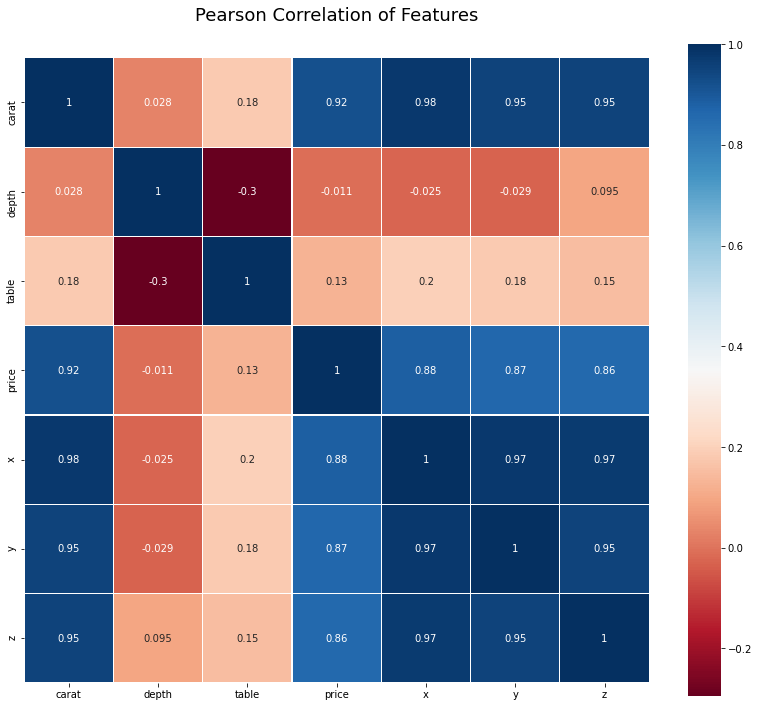

In [374]:
from matplotlib import pyplot as plt
import seaborn as sns

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
#матрица коррелляций пирсона - коррелляция каждого признака с каждым
plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(data._get_numeric_data().corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

### Комментарий

С целевой переменной (price) более всего коррелируют такие признаки как:
* carat
* x (ширина бриллианта)
* y (длина бриллианта)
* z (высота бриллианта)

Нельзя забывать, что отсутствие корреляции еще не означает отсутсвие зависимости, лишь говорит об отсутствии линейной зависимости.

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [375]:
data = pd.get_dummies(data, drop_first=True)
data.head(5)

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [376]:
from sklearn.model_selection import train_test_split
y = data['price']
X = data.drop(['price'], axis = 1)

np.random.seed(12345)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((37758, 23), (16182, 23), (37758,), (16182,))

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [392]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter("ignore")

scaler = StandardScaler()

scaler.fit(X_train[['carat', 'depth','table','x', 'y', 'z']])

X_train.loc[:, ['carat', 'depth','table','x', 'y', 'z']] = scaler.transform(X_train[['carat', 'depth','table','x', 'y', 'z']])
X_test.loc[:, ['carat', 'depth','table','x', 'y', 'z']] = scaler.transform(X_test[['carat', 'depth','table','x', 'y', 'z']])


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [393]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score

linearRegr = LinearRegression()
linearRegr.fit(X_train, Y_train)

print(f"MSE train: {mse(Y_train, linearRegr.predict(X_train))}")
print(f"MSE test: {mse(Y_test, linearRegr.predict(X_test))}")

print(f"Coefficient of determination train: {r2_score(linearRegr.predict(X_train), Y_train)}")
print(f"Coefficient of determination test: {r2_score(linearRegr.predict(X_test), Y_test)}")


MSE train: 1295920.73108544
MSE test: 1263039.4377476927
Coefficient of determination train: 0.912658535605277
Coefficient of determination test: 0.9143422113315355


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

### Комментарий
Ответ: вещественные переменные: 
* 'carat';
* 'x';

имеют коэффициенты по модулю превосходящие оценки прочих вещественных переменных.

In [394]:
columns = X_train.columns.values.tolist()
for column, coef in zip(columns, linearRegr.coef_):
    print(f"{column:<15}:{coef:>20,.3f}")

carat          :           5,363.934
depth          :             -99.198
table          :             -65.085
x              :          -1,544.203
y              :             417.870
z              :             -33.590
cut_Good       :             518.528
cut_Ideal      :             775.242
cut_Premium    :             722.209
cut_Very Good  :             664.465
color_E        :            -221.885
color_F        :            -283.972
color_G        :            -504.348
color_H        :            -994.999
color_I        :          -1,484.193
color_J        :          -2,420.808
clarity_IF     :           5,388.917
clarity_SI1    :           3,656.154
clarity_SI2    :           2,673.908
clarity_VS1    :           4,572.168
clarity_VS2    :           4,268.967
clarity_VVS1   :           5,028.581
clarity_VVS2   :           4,967.200


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [283]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

ridge = Ridge(10.0).fit(X_train,Y_train)
lasso = Lasso(10.0).fit(X_train, Y_train)
print("RidgeRegresssion:")
print ("Train: {}".format(mse(Y_train, ridge.predict(X_train))))
print ("Test: {}".format(mse(Y_test, ridge.predict(X_test))))
print("\nLasso Regression:")
print ("Train: {}".format(mse(Y_train, lasso.predict(X_train))))
print ("Test: {}\n".format(mse(Y_test, lasso.predict(X_test))))

columns = X_train.columns.values.tolist()
print("{:<15}{:>20}{:>20}{:>20}\n".format('Feature','Ridge','Lasso','Linear'))
for column, coef1, coef2, coef3 in zip(columns, ridge.coef_, lasso.coef_, linearRegr.coef_):
    print(f"{column:<15}:{coef1:>20,.3f}:{coef2:>20,.3f}:{coef3:>20,.3f}")

RidgeRegresssion:
Train: 1300112.8596539577
Test: 1258036.6009792478

Lasso Regression:
Train: 1523536.0665178495
Test: 1470098.5327946476

Feature                       Ridge               Lasso              Linear

carat          :           5,312.400:           4,811.885:           5,363.934
depth          :            -102.430:            -160.468:             -99.198
table          :             -68.023:            -113.716:             -65.085
x              :          -1,440.432:            -720.497:          -1,544.203
y              :             355.236:              -0.000:             417.870
z              :             -35.288:              -8.919:             -33.590
cut_Good       :             550.010:              -0.000:             518.528
cut_Ideal      :             809.948:             154.524:             775.242
cut_Premium    :             751.331:              68.684:             722.209
cut_Very Good  :             701.989:              72.398:             6

### Комментарий

Из таблицы выше видно, что Ridge-регрессия не сильно сократила веса изначальной модели (вывод сделать можно, сравнивая веса непосредственно линейной регрессии и Ridge-регресии), однако с регрессией Lasso дела обстоят лучше, данная регрессия более агрессивно уменьшает веса (появились вовсе зануленные веса для: x, y, cut_Good и так далее) Признаки x, y и z очень сильно коррелируют между друг другом, что видно по результатам задания 3.3, регрессия Lasso решает эту проблему путем уменьшения весов (у Z) и зануления (у Y). Проблема мультиколлинеарности несомненно была (в датасете были практически линейно зависимые признаки), веса у линейно зависимых переменных были достаточно большими, чтобы назвать влияние мультиколлинеарности на результаты модели значительным.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

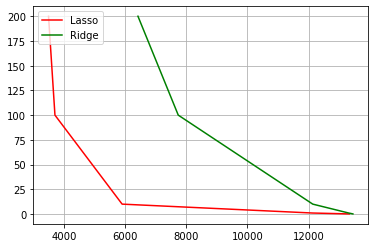

In [387]:
import matplotlib.pyplot as plt
%matplotlib inline

alpha = [0.1, 1., 10., 100., 200.]
normLasso = []
normRidge = []

for i in alpha:
    ridge = Ridge(i, tol=2e-4,max_iter=5000).fit(X_train,Y_train)
    lasso = Lasso(i, tol=2e-4,max_iter=5000).fit(X_train, Y_train)
    normLasso.append(np.linalg.norm(lasso.coef_))
    normRidge.append(np.linalg.norm(ridge.coef_))

plt.plot(normLasso, alpha, color='red',label="Lasso")
plt.plot(normRidge, alpha, color='green', label="Ridge")
plt.legend(loc = 'upper left')
plt.grid()

plt.show()

### Комментарий

Более агрессивно уменьшает веса (как было видно и по предыдущему заданию и по построенному графику) регрессия Lasso. Регрессия Lasso в отличие от Ridge регрессии позволяет избавиться от линейно-зависимых признаков (которые в противном случае могут привести к переобучению модели), а также агрессивнее уменьшает веса, как уже не раз демонстрировалось ранее (мы знаем, что большие веса это в большинстве своем плохо), исходя из этих факторов неудивительно, что данную регрессию чаще используют для отбора признаков.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [314]:
from sklearn.linear_model import LassoCV

np.random.seed(12345)
reg = LassoCV(alphas= [0.1, 1., 10., 100., 200.], cv=5, max_iter=5000).fit(X_train, Y_train)

error_matrix = reg.mse_path_
alphas = reg.alphas_

for alpha, error in zip(alphas, error_matrix):
    print(f"{alpha}\t: {np.mean(error)}")


200.0	: 2483612.335978492
100.0	: 2256795.5584347514
10.0	: 1526580.334656557
1.0	: 1305006.2786709233
0.1	: 1301471.7967407145


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [315]:
from sklearn.linear_model import LassoCV
np.random.seed(12345)

lasso = Lasso(0.1, tol=2e-4,max_iter=5000).fit(X_train, Y_train)
print("\nLasso Regression:")
print ("Train: {}".format(mse(Y_train, lasso.predict(X_train))))
print ("Test: {}\n".format(mse(Y_test, lasso.predict(X_test))))

columns = X_train.columns.values.tolist()
print("{:<15}{:>20}\n".format('Feature','Lasso'))
for column, coef1 in zip(columns, lasso.coef_):
    print(f"{column:<15}:{coef1:>20,.3f}")


Lasso Regression:
Train: 1295976.4297862283
Test: 1255689.2675495923

Feature                       Lasso

carat          :           5,359.444
depth          :            -100.556
table          :             -65.928
x              :          -1,486.758
y              :             362.610
z              :             -32.467
cut_Good       :             511.429
cut_Ideal      :             767.824
cut_Premium    :             712.856
cut_Very Good  :             658.554
color_E        :            -216.496
color_F        :            -278.572
color_G        :            -498.613
color_H        :            -989.256
color_I        :          -1,477.451
color_J        :          -2,412.661
clarity_IF     :           5,333.562
clarity_SI1    :           3,604.454
clarity_SI2    :           2,622.433
clarity_VS1    :           4,519.539
clarity_VS2    :           4,216.897
clarity_VVS1   :           4,974.753
clarity_VVS2   :           4,914.265


### Комментарий

Так как мы изначально масштабировали признаки, то говорить об их значимости по весам имеет смысл. 

Наиболее информативными оказались:
* carat - ожидаемо для бриллианта, является основным гарантом высокой стоимости
* clarity (по убыванию, начиная с лучшего показателя IF) - оценка "чистоты" бриллианта, тоже важный параметр
* color - цвет бриллианта (можно объяснить предпочтениями покупателей)
* x - (длина бриллианта в мм) здесь возможным объяснением может быть все та же проблема мультиколлинеарности
* cut - качество огранки бриллианта (тут важность параметра напрямую влияет на презентабельность продукта и спрос на него)

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [391]:
lasso = Lasso(0.1, tol=2e-4,max_iter=5000).fit(X_train, Y_train)
linearRegr = LinearRegression().fit(X_train, Y_train)
print("\t\tLinear\tLasso")
print(f"MSE train:\t{mse(Y_train, linearRegr.predict(X_train)):.4f}\t{mse(Y_train, lasso.predict(X_train)):.4f}")
print(f"MSE test:\t{mse(Y_test, linearRegr.predict(X_test)):.4f}\t{mse(Y_test, lasso.predict(X_test)):.4f}")


		Linear		Lasso
MSE train:	1295920.7311	1295976.4298
MSE test:	1263039.4377	1255689.2675


### Комментарий
Для предсказаний в данном случае, конечно, лучше использовать LassoRegression, mse данной модели немного меньше чем у LinearRegression, что может объясняться частичным решением проблемы мультиколлинеарности со стороны Lasso, что приводит к лучшим результатам.